In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')[['age', 'pclass', 'sibsp', 'parch', 'fare']]

In [3]:
df_complete = df.dropna().copy()

In [4]:
# Artificially remove 20% of the 'age' values to create a test set.
# We save the original ages so we can measure the error of our imputation.
true_ages = df_complete['age'].copy()
age_indices_to_remove = df_complete['age'].sample(frac=0.2, random_state=0).index
df_test = df_complete.copy()
df_test.loc[age_indices_to_remove, 'age'] = np.nan

In [5]:
# 2. Systematic Testing
# ----------------------
# Test a range of odd-numbered k values
k_values = range(1, 26, 2)
mse_scores = []
print("🧪 Testing k values...")

for k in k_values:
    # Create the imputer with the current k
    imputer = KNNImputer(n_neighbors=k)
    
    # Impute the missing values
    df_imputed_array = imputer.fit_transform(df_test)
    
    # Convert back to a DataFrame to easily access the 'age' column
    df_imputed = pd.DataFrame(df_imputed_array, columns=df_test.columns, index=df_test.index)
    
    # Get the imputed age values only for the rows we made missing
    imputed_ages = df_imputed.loc[age_indices_to_remove, 'age']
    original_ages_subset = true_ages.loc[age_indices_to_remove]
    
    # Calculate the Mean Squared Error and store it
    error = mean_squared_error(original_ages_subset, imputed_ages)
    mse_scores.append(error)
    print(f"  k={k}, MSE={error:.4f}")

# Find the best k with the minimum error
optimal_k = k_values[np.argmin(mse_scores)]
print(f"\n✅ Optimal k found: {optimal_k}")

🧪 Testing k values...
  k=1, MSE=307.8568
  k=3, MSE=211.1793
  k=5, MSE=195.1950
  k=7, MSE=188.9488
  k=9, MSE=189.5238
  k=11, MSE=181.6874
  k=13, MSE=185.3128
  k=15, MSE=178.7528
  k=17, MSE=174.7920
  k=19, MSE=176.0508
  k=21, MSE=177.1255
  k=23, MSE=179.7033
  k=25, MSE=179.4458

✅ Optimal k found: 17


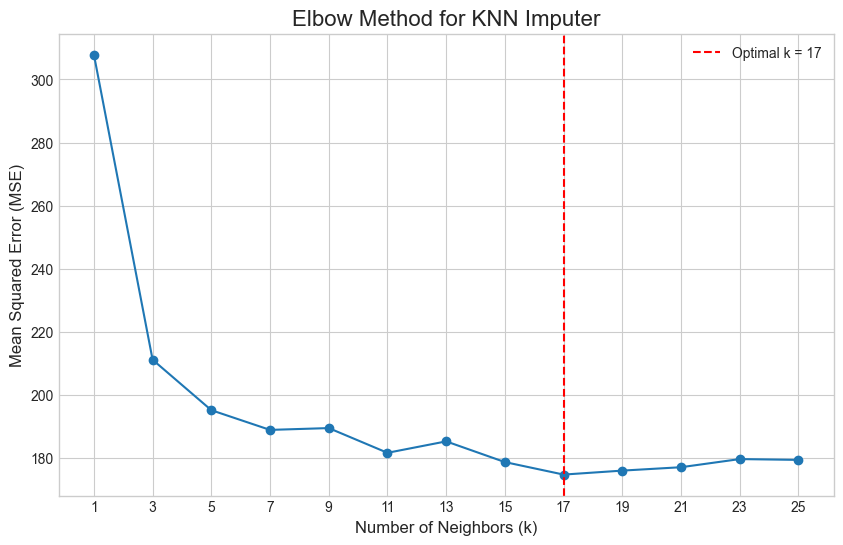

In [6]:
# 3. The Elbow Method Plot
# ------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(k_values, mse_scores, marker='o', linestyle='-')
ax.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')

ax.set_title('Elbow Method for KNN Imputer', fontsize=16)
ax.set_xlabel('Number of Neighbors (k)', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax.legend()
plt.xticks(k_values)
plt.show()

In [7]:
# 4. Apply the Optimal KNN Imputer to the Original Data
# -----------------------------------------------------
print(f"\n⚡ Applying final imputer with k={optimal_k} to the original DataFrame...")

# Create the final imputer with the best k
final_imputer = KNNImputer(n_neighbors=optimal_k)

# Fit and transform the original DataFrame with missing values
final_imputed_array = final_imputer.fit_transform(df)

# Convert back to a DataFrame, preserving the original index
df_final_imputed = pd.DataFrame(final_imputed_array, columns=df.columns, index=df.index)

print("\n--- Final Imputed DataFrame ---")
print("Missing values after final imputation:")
print(df_final_imputed.isnull().sum())
print("\nDataFrame head with imputed values:")
print(df_final_imputed.head())



⚡ Applying final imputer with k=17 to the original DataFrame...

--- Final Imputed DataFrame ---
Missing values after final imputation:
age       0
pclass    0
sibsp     0
parch     0
fare      0
dtype: int64

DataFrame head with imputed values:
    age  pclass  sibsp  parch     fare
0  22.0     3.0    1.0    0.0   7.2500
1  38.0     1.0    1.0    0.0  71.2833
2  26.0     3.0    0.0    0.0   7.9250
3  35.0     1.0    1.0    0.0  53.1000
4  35.0     3.0    0.0    0.0   8.0500
